In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def read_price(filename):
    p1 = []
    p2 = []
    with open(filename) as fd:
        lines = fd.readlines()
        for l in lines:
            l = l.strip().split(' ; ')
            p1.append(float(l[0]))
            p2.append(float(l[1]))
    return p1, p2

In [89]:
def draw(p1, p2):
    # Example list of data
    data_1 = np.array(p1)
    data_2 = np.array(p2)

    # Divide data into 9 bins
    bins_1 = np.linspace(10, 20, 10)
    bins_2 = np.linspace(10, 20, 10)

    # Compute histogram of the data
    hist_1, bins_1 = np.histogram(data_1, bins=bins_1)
    hist_2, bins_2 = np.histogram(data_2, bins=bins_2)

    # Create a bar plot using Matplotlib
    plt.figure(figsize=(4, 2), dpi=250)
    plt.bar(bins_1[:-1]+0, hist_1, width=0.3 * (bins_1[1]-bins_1[0]), align='edge', label='Before AI Critic')
    plt.bar(bins_2[:-1]+0.3, hist_2, width=0.3 * (bins_2[1]-bins_2[0]), align='edge', label='After AI Critic')
    
    # Add numbers at the center of each bar
    for i in range(len(hist_1)):
        x1 = bins_1[i] + 0.15 * (bins_1[1]-bins_1[0])
        y1 = hist_1[i]
        plt.text(x1, y1+1, str(y1), ha='center', fontsize=7)

    for i in range(len(hist_2)):
        x2 = bins_2[i] + 0.45 * (bins_2[1]-bins_2[0])
        y2 = hist_2[i]
        plt.text(x2, y2+1, str(y2), ha='center', fontsize=7)

    # Set the title and axis labels
    plt.title('Distribution of deal price')
    xticks = np.arange(10, 21, 2)
    plt.xticks(xticks, [str(x) for x in xticks], fontsize=8)
    plt.xlabel('Deal price')
    plt.ylabel('Frequency')
    plt.legend(fontsize=7)

    # Display the plot
    plt.show()
    return 

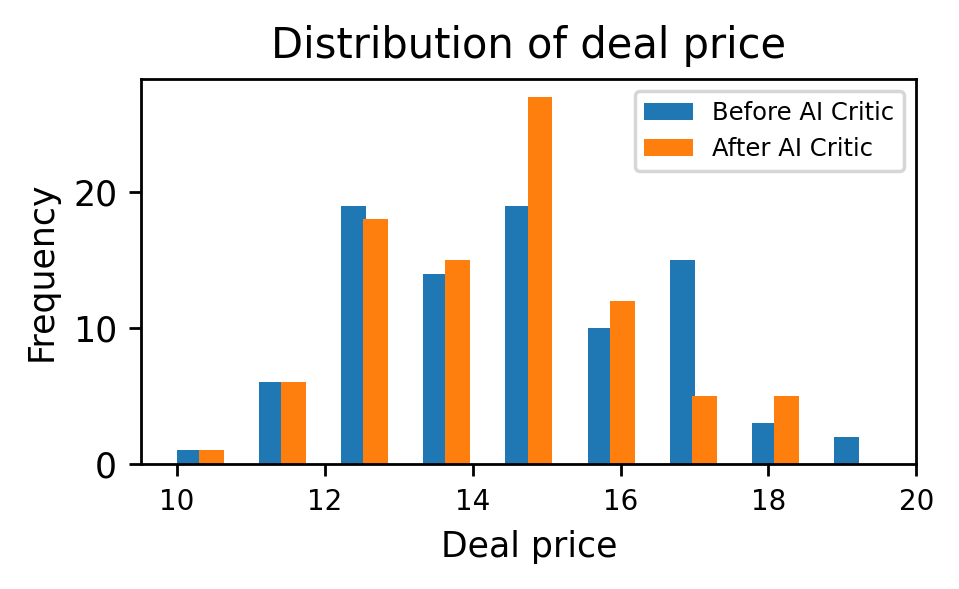

In [13]:
draw(*read_price('outputs/buyer_critic_100_runs_0.1_final_prices.txt'))

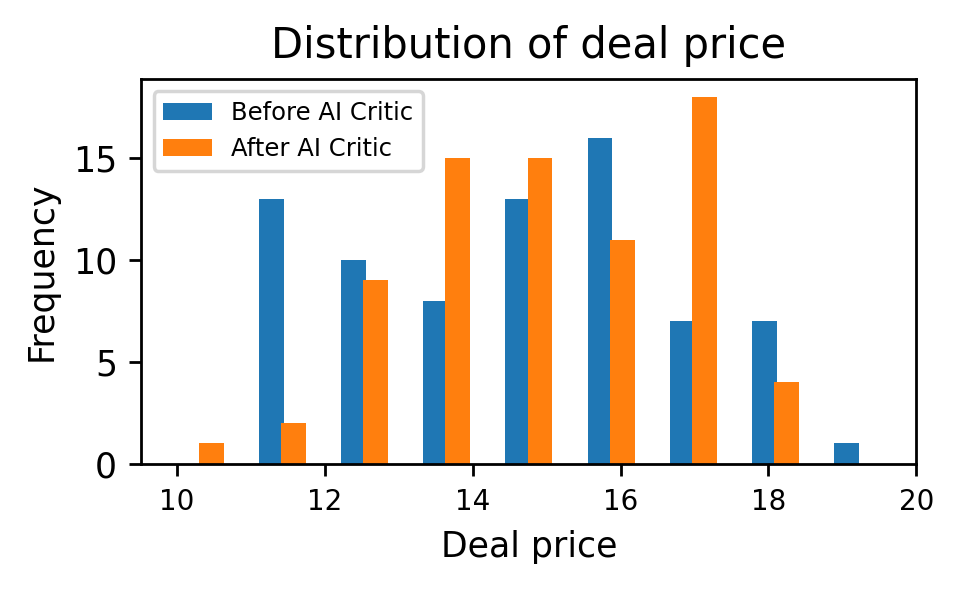

In [14]:
draw(*read_price('outputs/buyer_critic_100_runs_0.3_final_prices.txt'))

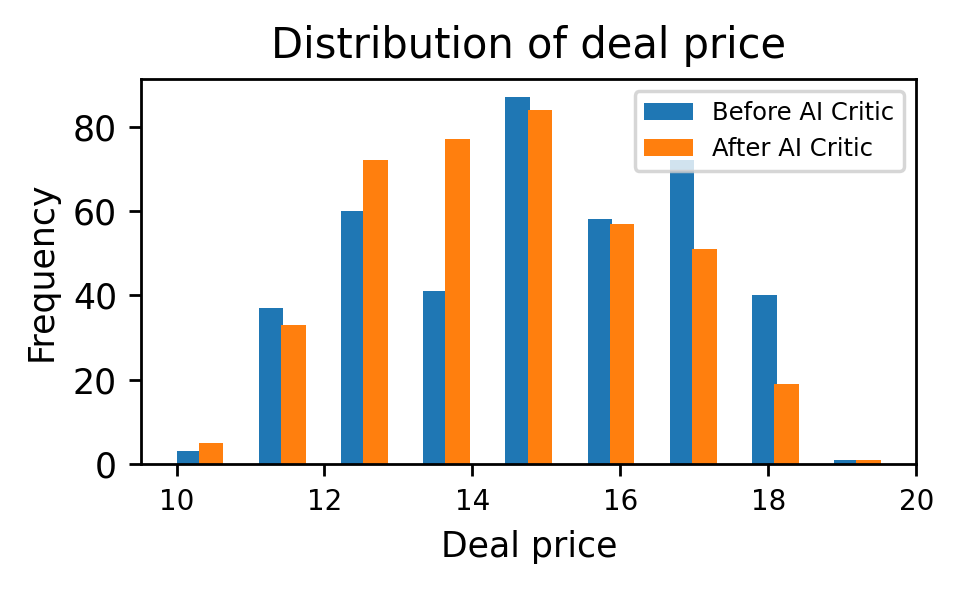

In [15]:
draw(*read_price('outputs/buyer_critic_500_runs_0.1.1_final_prices.txt'))

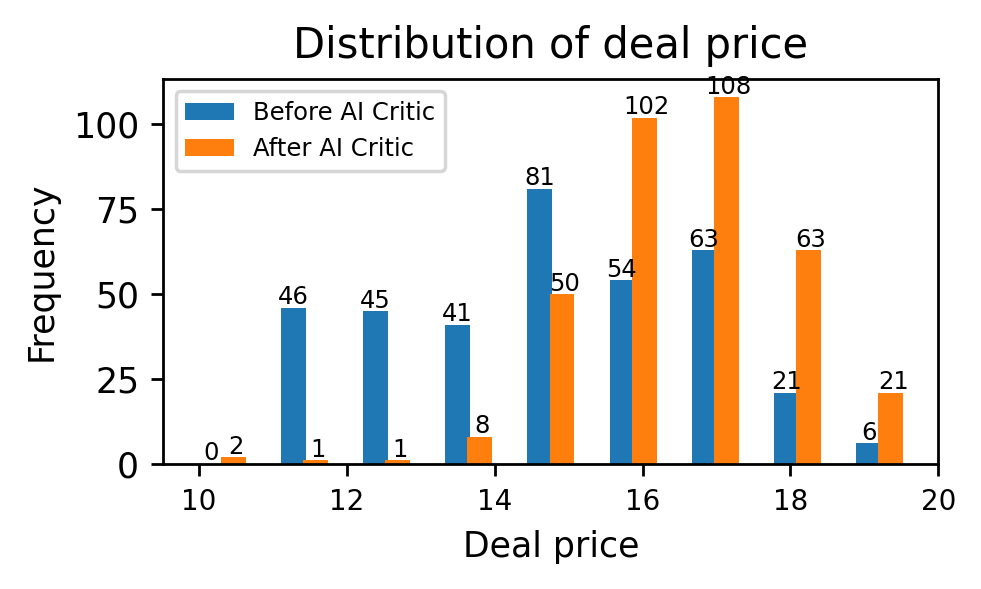

In [23]:
draw(*read_price('outputs/seller_critic_500_runs_0.5.0_final_prices.txt'))

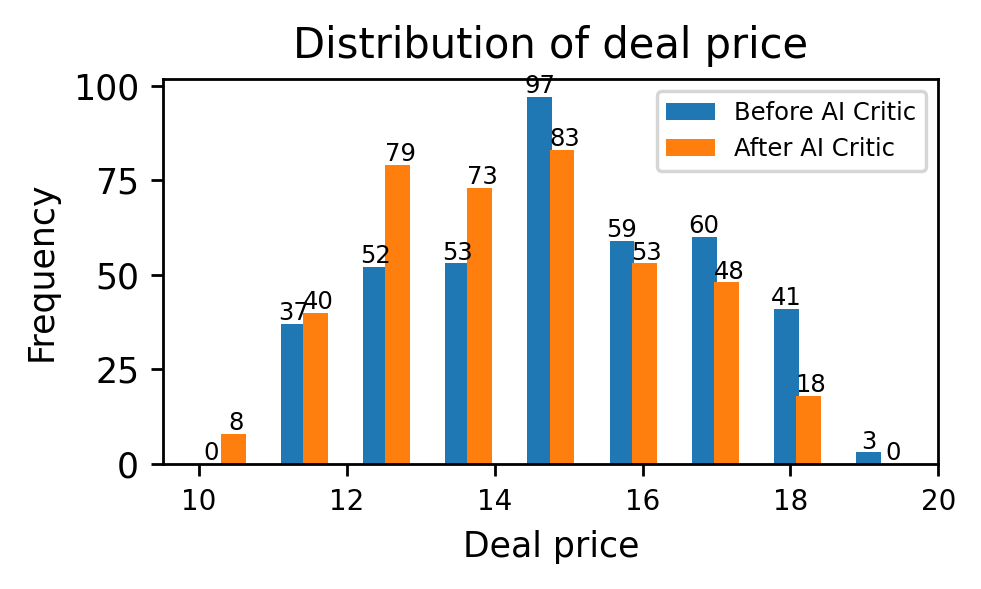

In [22]:
draw(*read_price('outputs/buyer_critic_gpt_4_500_runs_rollout_2_ver_1.6.0.txt'))

In [ ]:
draw(*read_price('outputs/buyer_critic_500_runs_0.1.2_final_prices.txt'))

In [4]:
from utils import parse_outputs, check_k_price_range

In [2]:
prices = parse_outputs("outputs/seller_critic_500_runs_rollout_3_0.5.1.txt")

In [5]:
filtered_price = [p for p in prices if check_k_price_range(p, 10, 20)]

In [6]:
len(filtered_price)

246

In [87]:
def draw_multiple(ps):
    # Example list of data
    data = []
    for pi, p in enumerate(ps):
        if(pi == 0): 
            for p_ in p: data.append([p_])
        else: 
            for pj, p_ in enumerate(p): data[pj].append(p_)

    # Divide data into 10 bins
    bins = np.linspace(10, 20, 11)

    # Compute histogram of the data
    hist = []
    for d in data:
        h, b = np.histogram(d, bins=bins)
        hist.append(h)

    # Create a bar plot using Matplotlib
    plt.figure(figsize=(4, 2), dpi=250)
    labels = []
    x_shift = 0.1
    for i in range(len(hist)):
        if(i == 0): labels.append('Run %d, Before AI Critic' % (i + 1))
        else: labels.append('Run %d, After AI Critic' % (i + 1))
        plt.bar(x_shift + bins[:-1]+0.3*i, hist[i], width=0.2 * (bins[1]-bins[0]), align='edge', label=labels[i])
        # Add numbers at the center of each bar
        for j in range(len(hist[i])):
            x = bins[j] + 0.15 * (bins[1]-bins[0]) + 0.3*i + x_shift
            y = hist[i][j]
            plt.text(x, y+1, str(y), ha='center', fontsize=7)

    # Set the title and axis labels
    plt.title('Distribution of deal price')
    xticks = np.arange(10, 21, 2)
    plt.xticks(xticks, [str(x) for x in xticks], fontsize=8)
    plt.xlabel('Deal price')
    plt.ylabel('Frequency')
    plt.legend(fontsize=7)

    # Display the plot
    plt.show()
    return


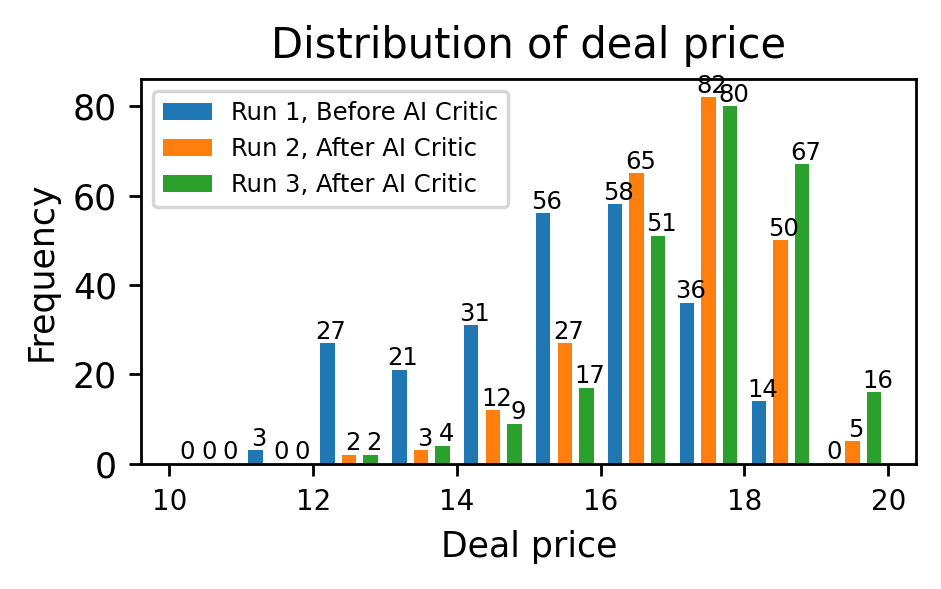

In [75]:
draw(filtered_price)

In [98]:
prices = parse_outputs("outputs/buyer_critic_gpt_4_500_runs_rollout_2_ver_1.6.0.txt")

In [99]:
filtered_price = [p for p in prices if check_k_price_range(p, 10, 20)]

In [100]:
len(filtered_price)

413

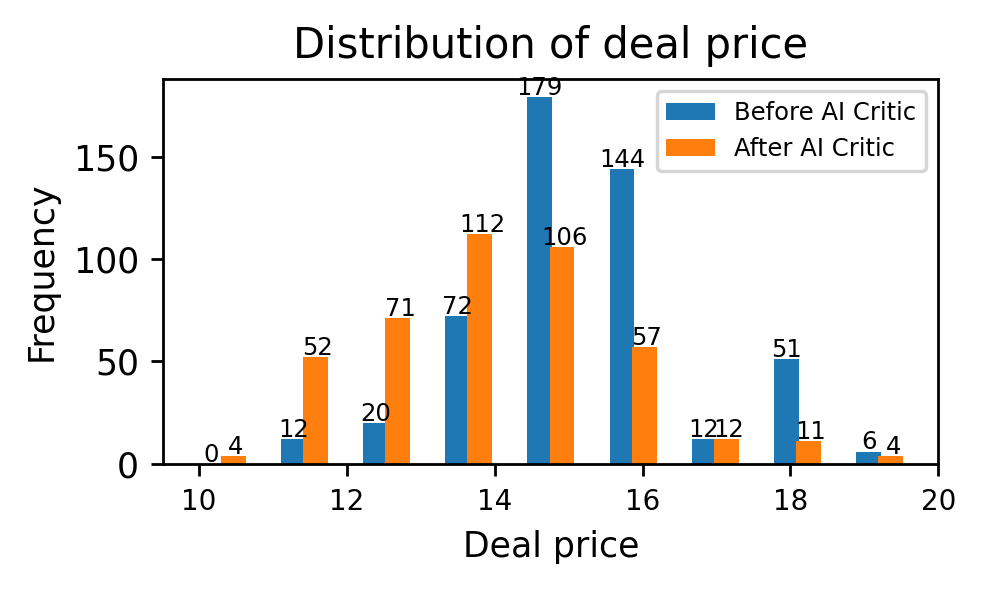

15.466 12.423399999999999


In [101]:
p0 = [p[0] for p in prices]
p1 = [p[1] for p in prices]
draw(p0, p1)
print(np.average(p0), np.average(p1))

In [93]:
prices = parse_outputs("outputs/seller_critic_gpt_4_500_runs_rollout_2_ver_1.5.0.txt")

In [94]:
filtered_price = [p for p in prices if check_k_price_range(p, 10, 20)]

In [95]:
len(filtered_price)

295

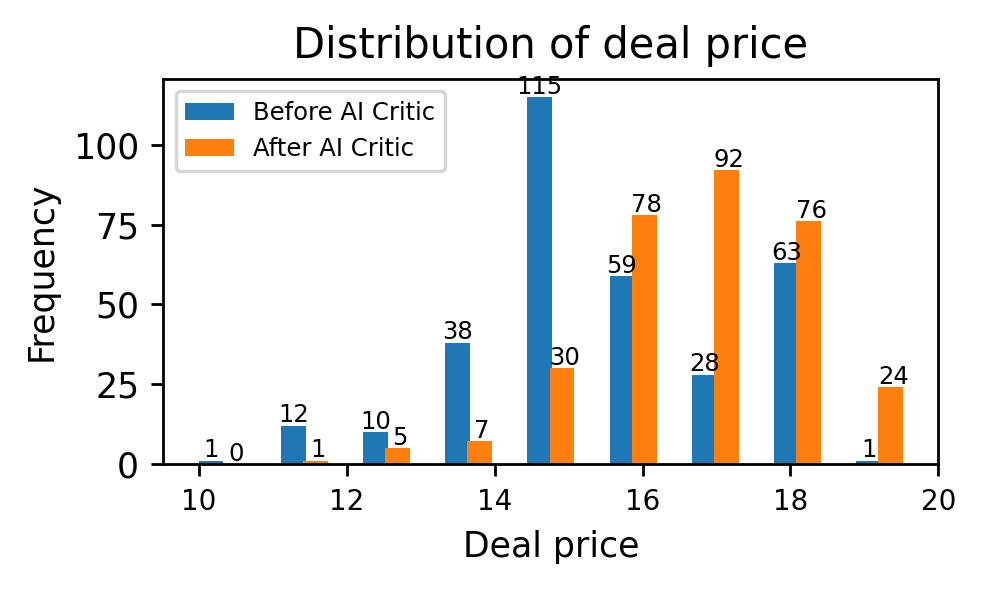

15.739457831325302
17.088825301204817


In [96]:
p0 = [p[0] for p in prices]
p1 = [p[1] for p in prices]
draw(p0, p1)
print(np.average(p0))
print(np.average(p1))